In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled =StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])
df_market_data_scaled[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [7]:
# Create a DataFrame with the scaled data
df_market_data_scaled=pd.DataFrame(df_market_data_scaled,columns=['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'])
df_market_data_scaled.head(2)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"]= df_market_data.index

# Set the coinid column as index
df_market_data_scaled=df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head(2)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters = i, random_state =0)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)

C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data ={
                        "k":k,
                        "inertia":inertia
    
                        }

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data= pd.DataFrame(elbow_data)
df_elbow_data

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_data_plot =df_elbow_data.hvplot.line(x ="k",y="inertia",title="Elbow Curve Using kmeans data ",xticks=k )
df_elbow_data_plot

:Curve   [k]   (inertia)

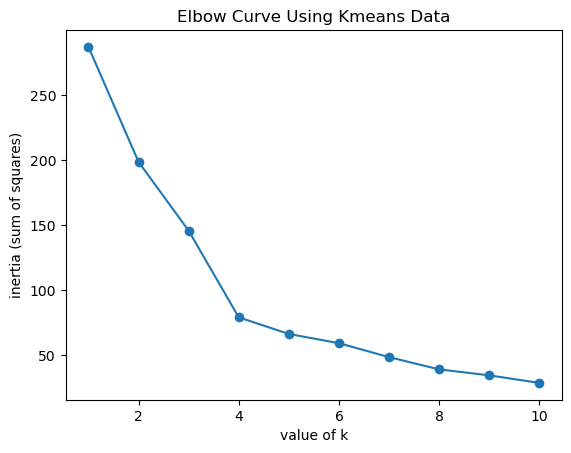

In [12]:
# alternative method
import matplotlib.pyplot as plt
plt.plot(range(1,11),inertia,marker ="o")
plt.title("Elbow Curve Using Kmeans Data")
plt.xlabel("value of k")
plt.ylabel("inertia (sum of squares)")
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

the Best value of K is 4 from the elbow Curve
**Answer:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [13]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = 4,random_state=123)
model

KMeans(n_clusters=4, random_state=123)

In [14]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=123)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = model.predict(df_market_data_scaled)


# Print the resulting array of cluster values.
predicted_clusters[:]

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [16]:
# Create a copy of the DataFrame
df_market=df_market_data_scaled.copy()
df_market.head(1)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.7722,0.23546,-0.067495,-0.355953,-0.251637


In [17]:
# Add a new column to the DataFrame with the predicted clusters
df_market["predicted_clusters"]=predicted_clusters

# Display sample data
df_market.head(3)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3


In [18]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
#df_market.plot.scatter(x="price_change_percentage_24h",y ="price_change_percentage_7d",c="predicted_clusters")

df_market.hvplot.scatter(
        x="price_change_percentage_24h",
        y="price_change_percentage_7d",
        by ="predicted_clusters",
        hover_cols = ["coin_id"],
        title ="Scatter Plot by Stock Segment- k=4"
            )

:NdOverlay   [predicted_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3,random_state=123)

In [20]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_data_pca = pca.fit_transform(df_market)
# View the first five rows of the DataFrame. 
market_data_pca[:5]
market_data_pca=pd.DataFrame(market_data_pca, columns=["pca1","pca2","pca3"])
market_data_pca.head()

,pca1,pca2,pca3
0,2.034093,-0.641571,-0.357629
1,1.994502,-0.490549,-0.912250
2,-1.068544,-0.417205,0.596311
3,-1.040919,-0.455234,0.467801
4,3.302764,-1.242458,-0.217276


In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.36941241, 0.29169375, 0.22893878])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:*0.36941241+0.29169375+0.22893878
=0.89004494
89.00%

In [22]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
market_data_pca=pd.DataFrame(market_data_pca, columns=["pca1","pca2","pca3"])
# Copy the crypto names from the original data
market_data_pca["coin_id"]=df_market_data.index

# Set the coinid column as index
market_data_pca=market_data_pca.set_index("coin_id")

# Display sample data
market_data_pca.head(2)

,pca1,pca2,pca3
coin_id,,,
bitcoin,2.034093,-0.641571,-0.357629
ethereum,1.994502,-0.490549,-0.912250


---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11
k =list(range(1,11))

In [24]:
# Create an empty list to store the inertia values
inertia =[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model=KMeans(n_clusters =i,random_state = 0)
    model.fit(market_data_pca)
    inertia.append(model.inertia_)
    

C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca ={
                "k":k,
                "inertia":inertia
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data_pca=pd.DataFrame(elbow_data_pca)
df_elbow_data_pca

,k,inertia
0,1,325.734740
1,2,236.807976
2,3,111.736809
3,4,40.197284
4,5,29.945909
5,6,20.988916
6,7,19.352453
7,8,12.903677
8,9,10.472156
9,10,8.692522


In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca=df_elbow_data_pca.hvplot.line(x="k",y="inertia",title="Elbow Curve Using pca Data",xticks =k)
elbow_plot_pca

:Curve   [k]   (inertia)

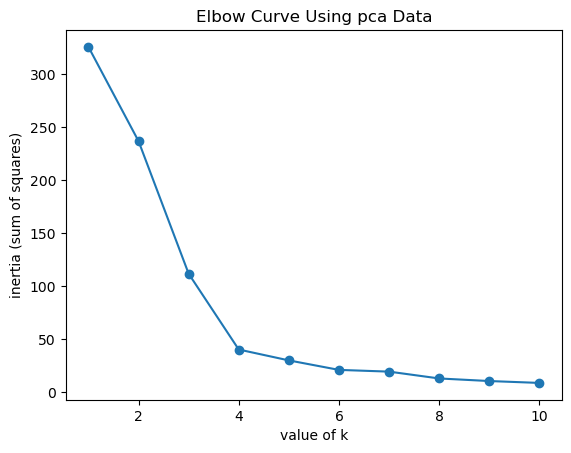

In [27]:
# Alternative PLot
# alternative method
import matplotlib.pyplot as plt
plt.plot(range(1,11),inertia,marker ="o")
plt.title("Elbow Curve Using pca Data")
plt.xlabel("value of k")
plt.ylabel("inertia (sum of squares)")
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** K = 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** NO , the best K is still 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [28]:
# Initialize the K-Means model using the best value for k
model =KMeans(n_clusters = 4,random_state=123)

In [29]:
# Fit the K-Means model using the PCA data
model.fit(market_data_pca)

C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=123)

In [30]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_pca_clusters=model.predict(market_data_pca)
# Print the resulting array of cluster values.
predicted_pca_clusters[:5]

array([0, 0, 1, 1, 0])

In [31]:
# Create a copy of the DataFrame with the PCA data
df_pca =market_data_pca.copy()
df_pca.head(2)

# Add a new column to the DataFrame with the predicted clusters
df_pca["predicted_pca_clusters"]=predicted_pca_clusters

# Display sample data
df_pca

,pca1,pca2,pca3,predicted_pca_clusters
coin_id,,,,
bitcoin,2.034093,-0.641571,-0.357629,0
ethereum,1.994502,-0.490549,-0.912250,0
tether,-1.068544,-0.417205,0.596311,1
ripple,-1.040919,-0.455234,0.467801,1
bitcoin-cash,3.302764,-1.242458,-0.217276,0
binancecoin,2.505692,-0.575832,-0.129389,0
chainlink,2.770042,-0.495691,-1.890371,0
cardano,2.372449,-0.389146,-0.992513,0
litecoin,1.832344,-0.678797,-0.741581,0


In [32]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_pca.hvplot.scatter(
        x="pca1",
        y="pca2",
        by ="predicted_pca_clusters",
        hover_cols = ["coin_id"],
        title ="Scatter Plot by Stock Segment- k=4"
            )

:NdOverlay   [predicted_pca_clusters]
   :Scatter   [pca1]   (pca2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

Text(0, 0.5, 'inertia (sum of squares)')

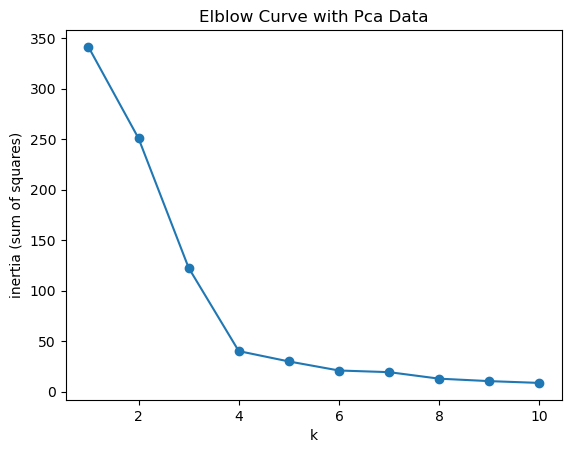

In [33]:
# Composite plot to contrast the Elbow curves
k=list(range(1,11))
inertia = []
for i in k:
    model=KMeans(n_clusters=i, random_state=0)
    model.fit(df_pca)
    inertia.append(model.inertia_)

plt.plot(range(1,11), inertia ,marker ="o")
plt.title("Elblow Curve with Pca Data")
plt.xlabel("k")
plt.ylabel("inertia (sum of squares)")

C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

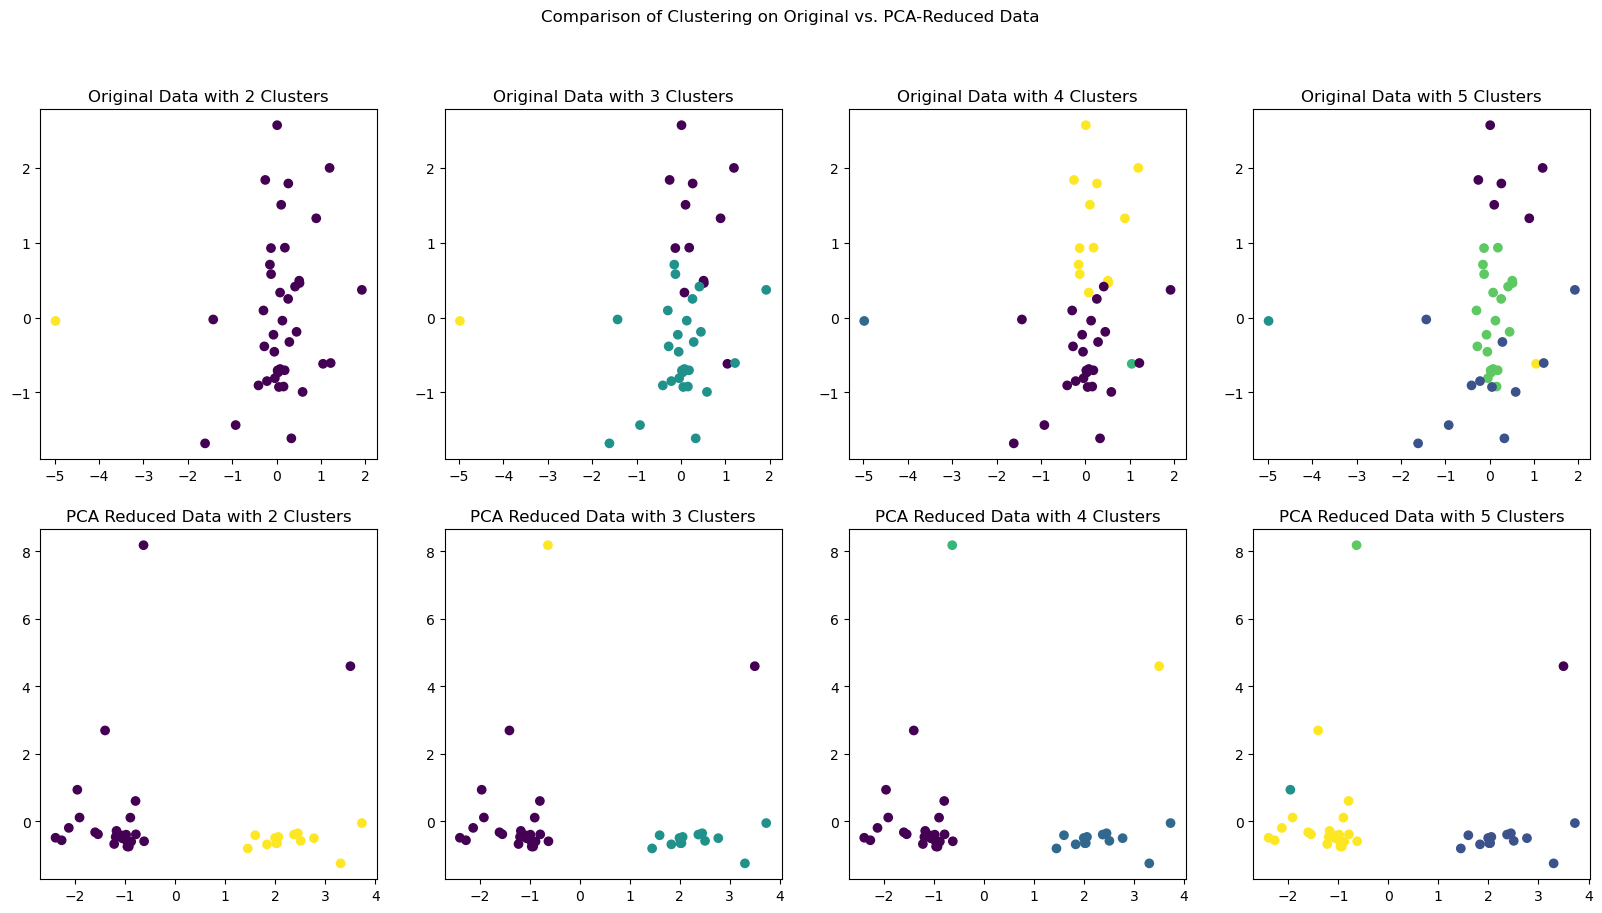

In [34]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!


# Load the dataset
##df_market_data = pd.read_csv('path_to_your_data.csv')  # Update with the correct path
df_original_scaled=df_market_data_scaled.copy()


# Assuming the need to drop non-numeric columns if present:
# df_market_data = df_market_data.select_dtypes(include=[np.number])

# PCA with 3 components
pca = PCA(n_components=3)
#reduced_data = pca.fit_transform(df_original_scaled)
df_pca=market_data_pca.copy()






# Ensure the scaled and PCA-transformed data are loaded correctly
try:
    df_original_scaled = df_market_data_scaled.copy()
    df_pca = market_data_pca.copy()
except:
    print("Error loading data. Check file paths and data integrity.")

# K-Means clustering on the original scaled data and PCA reduced data
k_values = [2, 3, 4, 5]  # Different cluster counts to try
fig, axs = plt.subplots(2, len(k_values), figsize=(20, 10))

for i, k in enumerate(k_values):
    kmeans_original = KMeans(n_clusters=k)
    kmeans_original.fit(df_original_scaled)
    labels_original = kmeans_original.labels_
    
    kmeans_pca = KMeans(n_clusters=k)
    kmeans_pca.fit(df_pca)
    labels_pca = kmeans_pca.labels_

    # Plot original data clustering results
    axs[0, i].scatter(df_original_scaled.iloc[:, 0], df_original_scaled.iloc[:, 1], c=labels_original, cmap='viridis')
    axs[0, i].set_title(f'Original Data with {k} Clusters')

    # Plot PCA reduced data clustering results
    axs[1, i].scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=labels_pca, cmap='viridis')
    axs[1, i].set_title(f'PCA Reduced Data with {k} Clusters')

plt.suptitle('Comparison of Clustering on Original vs. PCA-Reduced Data')
plt.show()



In [35]:
elbow_plot_pca+df_elbow_data_plot

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** using fewer features, you get a better distict clusters. pca has enough complexity to capture essential patterns while removing redundant or irrelvant information that does not contribute to or may even obsecure meaningful clustering